In [105]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import impulse, lti, step, butter, lfilter, welch
from scipy.fft import fft, ifft, fftshift
from statsmodels.tsa.arima.model import ARIMA

In [46]:
df1 = pd.read_csv('data/U3.ASC', sep="\s+", names=['time', 'y', 'u'])
df2 = pd.read_csv('data/U1.ASC', sep="\s+", names=['time', 'y', 'u'])
time1 = np.asarray(df1['time'])
u1 = np.asarray(df1['u'])
y1 = np.asarray(df1['y'])
time2 = np.asarray(df2['time'])
u2 = np.asarray(df2['u'])
y2 = np.asarray(df2['y'])

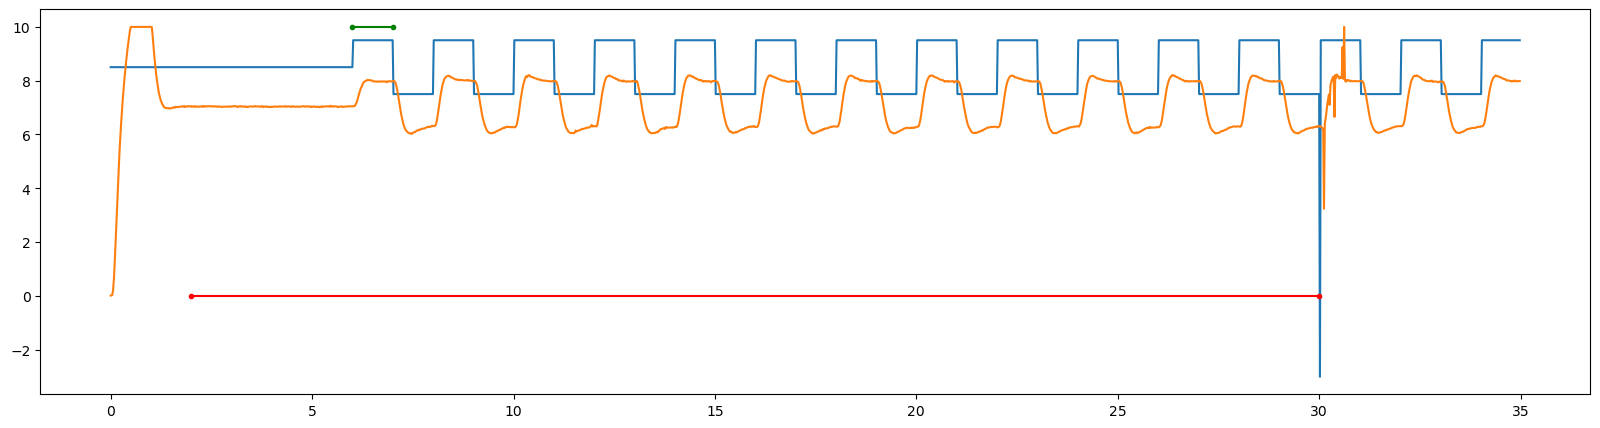

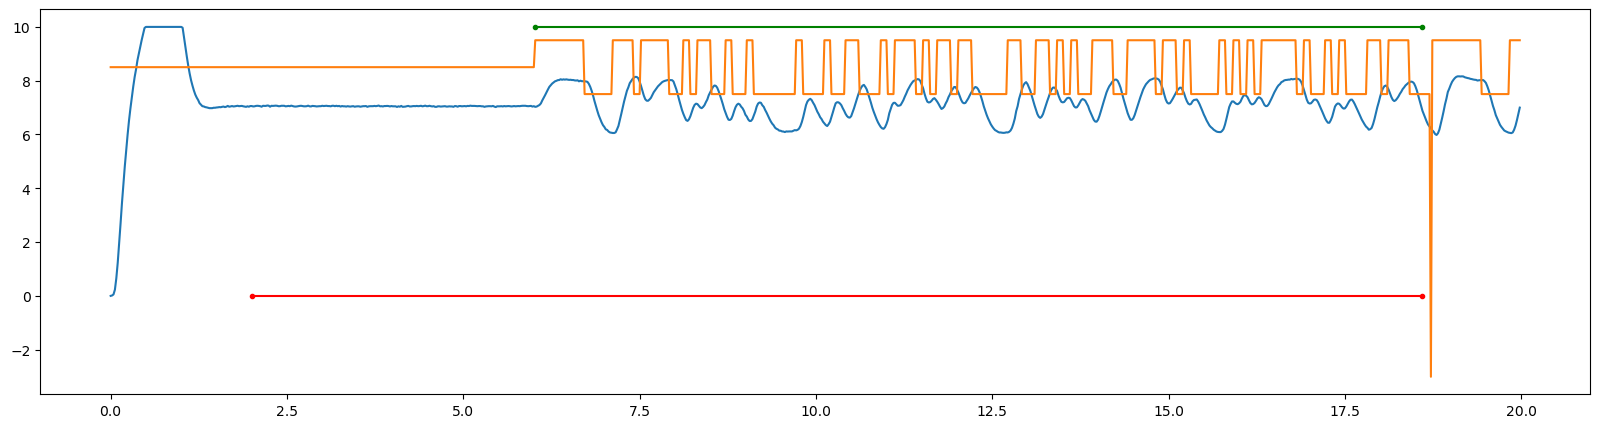

In [61]:
plt.figure(figsize=(20,5))
plt.plot(time1,u1)
plt.plot(time1,y1)
plt.plot([time1[100],time1[1500]],[0,0],'r', marker='.')
plt.plot([time1[300],time1[350]],[10,10],'g', marker='.')
plt.show()
plt.figure(figsize=(20,5))
plt.plot(time2,y2)
plt.plot(time2,u2)
plt.plot([time2[100],time2[930]],[0,0],'r', marker='.')
plt.plot([time2[301],time2[930]],[10,10],'g', marker='.')
plt.show()

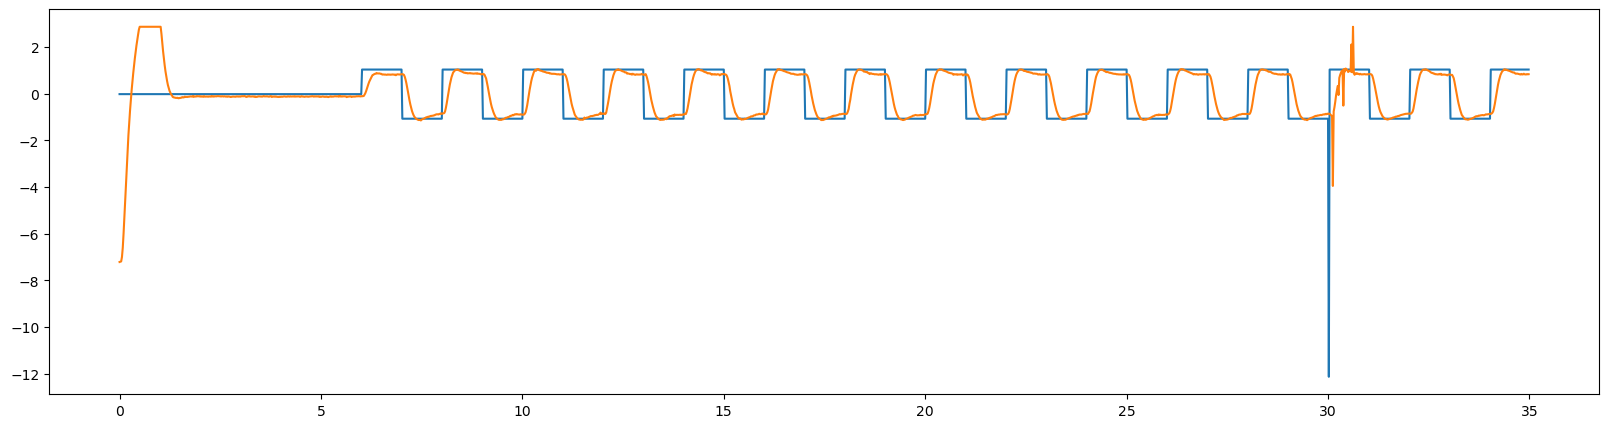

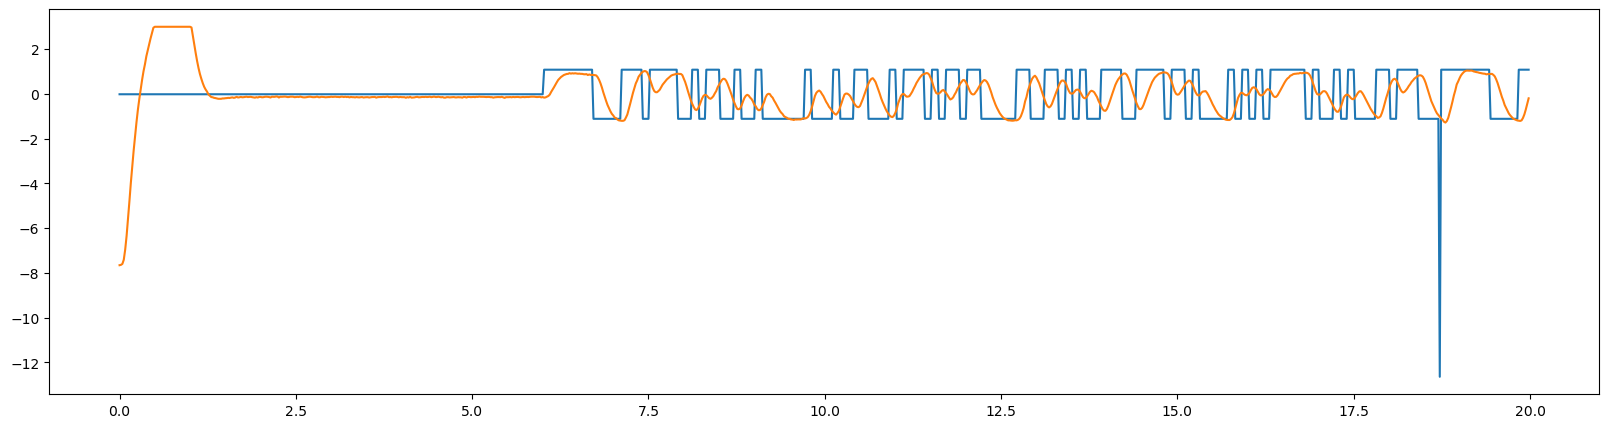

In [78]:
# z-normalize the signals
def z(x):
    x = np.asarray(x)
    return (x-np.average(x)) / np.std(x)

df1['u'] = z(df1['u'])
df1['y'] = z(df1['y'])
df2['u'] = z(df2['u'])
df2['y'] = z(df2['y'])

# time1, u1, y1, time2, u2, y2 = time1[:1500-100], u1[100:1500], y1[100:1500], time2[:930-100], u2[100:930], y2[100:930]
# u1, y1, u2, y2 = z(u1), z(y1), z(u2), z(y2)

plt.figure(figsize=(20,5))
plt.plot(df1['time'],df1['u'])
plt.plot(df1['time'],df1['y'])
plt.show()
plt.figure(figsize=(20,5))
plt.plot(df2['time'],df2['u'])
plt.plot(df2['time'],df2['y'])
plt.show()

In [1]:
# fourier space and PSD

u1 = df1['u'][:1500]
u2 = df2['u'][:930]
y1 = df1['y'][:1500]
y2 = df2['y'][:930]

fs = 1 # define sampling frequency to be 1

fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$U_1$', fontsize=20)
f1, psd1 = welch(u1, fs, nperseg=len(u1))
ft1 = np.fft.fft(u1)
freqs1 = np.fft.fftfreq(len(u1), 1)
axn[0].plot(f1, psd1)
axn[1].plot(freqs1, np.real(ft1))
axn[2].plot(freqs1, np.imag(ft1))
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()
fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$Y_1$', fontsize=20)
f1, psd1_ = welch(y1, fs, nperseg=len(u1))
ft1_ = np.fft.fft(y1)
freqs1 = np.fft.fftfreq(len(y1), 1)
axn[0].plot(f1, psd1_, c='r')
axn[1].plot(freqs1, np.real(ft1_), c='r')
axn[2].plot(freqs1, np.imag(ft1_), c='r')
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()
fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$Y_1/U_1$', fontsize=20)
psd1__mag = np.abs(ft1_/ft1) ** 2
axn[0].loglog(freqs1, psd1__mag, c='g')
axn[1].plot(freqs1, np.real(ft1_/ft1), c='g')
axn[2].plot(freqs1, np.imag(ft1_/ft1), c='g')
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()

fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$U_2$', fontsize=20)
f2, psd2 = welch(u2, fs, nperseg=len(u2))
ft2 = np.fft.fft(u2)
freqs2 = np.fft.fftfreq(len(u2), 1)
axn[0].plot(f2, psd2)
axn[1].plot(freqs2, np.real(ft2))
axn[2].plot(freqs2, np.imag(ft2))
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()
fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$Y_2$', fontsize=20)
f2, psd2_ = welch(y2, fs, nperseg=len(u2))
ft2_ = np.fft.fft(y2)
freqs2 = np.fft.fftfreq(len(y2), 1)
axn[0].plot(f2, psd2_, c='r')
axn[1].plot(freqs2, np.real(ft2_), c='r')
axn[2].plot(freqs2, np.imag(ft2_), c='r')
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()
fig, axn = plt.subplots(1,3,figsize=(20,5))
fig.suptitle(r'$Y_2/U_2$', fontsize=20)
psd2__mag = np.abs(ft2_/ft2) ** 2
axn[0].loglog(freqs2, psd2__mag, c='g')
axn[1].loglog(freqs2, np.real(ft2_/ft2), c='g')
axn[2].loglog(freqs2, np.imag(ft2_/ft2), c='g')
axn[0].set_title('PSD')
axn[1].set_title('Re')
axn[2].set_title('Im')
plt.show()

#######################################

# Assuming u and y are your input and output signals, and N is the length of the signals
N = len(u2)
n = np.arange(N)

# Compute the FFT of the input and output signals
U = np.fft.fft(u2)
Y = np.fft.fft(y2)

# Compute the ETFE
G_hat = Y / U

# Create a Parzen window
def parzen_window(M):
    n = np.arange(M)
    m = (n - M / 2) / (M / 2)
    w = np.zeros(M)
    w[abs(m) < 0.5] = 1 - 6 * m[abs(m) < 0.5]**2 + 6 * abs(m[abs(m) < 0.5])**3
    w[abs(m) >= 0.5] = 2 * (1 - abs(m[abs(m) >= 0.5]))**3
    return w

W = parzen_window(N)

# Smooth the ETFE estimate with the Parzen window using circular convolution
G_hat_smoothed = np.fft.ifft(fftshift(W) * G_hat)

# Take the real part of the smoothed ETFE (discard imaginary part due to numerical errors)
G_hat_smoothed = np.real(G_hat_smoothed)

fig, axn = plt.subplots(1,3,figsize=(20,5))
axn[1].loglog(freqs2, G_hat_smoothed, c='g')
axn[1].set_title('Re(G) smoothed')
plt.show()

NameError: name 'df1' is not defined

{1.0798259052970434, -0.000912980309190066, -1.0813222606612334}


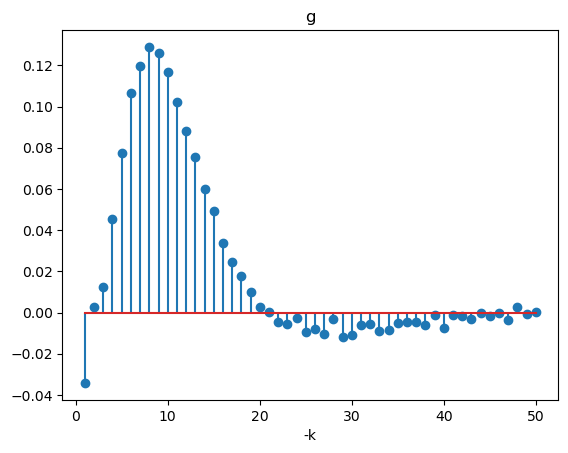

In [82]:
# step response for u1

u1 = z(df1['u'][100:1500]) # the part before the impulse
y1 = z(df1['y'][100:1500]) # the part before the impulse
time1 = df1['time'][100:1500] # the part before the impulse

print(set(u1))

u1_bin = []
for i in u1:
    if i == 1.0798259052970434: u1_bin.append(1)
    if i == -0.000912980309190066: u1_bin.append(0)
    if i == -1.0813222606612334: u1_bin.append(-1)

# Find the locations of the rising edges in the input
rising_indices = np.where(np.diff(u1_bin) == 2)[0] + 1
falling_indices = np.where(np.diff(u1_bin) == -2)[0] + 1

impulse_responses_rising = np.asarray([y1[i:i+50] for i in rising_indices][1:]) # exclude the first one because different (starting from zero)
impulse_responses_falling = np.asarray([-y1[i:i+50] for i in falling_indices][:-1]) # exclude the last one because it is shorter
impulse_responses = np.vstack([impulse_responses_rising,impulse_responses_falling])

impulse_response = (np.mean(impulse_responses, axis=0) + 1)/ 2 # + 1)/ 2 because -1 to 1

g = [impulse_response[0]]
for i in range(1, len(impulse_response)):
    g.append(impulse_response[i]-impulse_response[i-1])

# Plotting the Impulse Response
plt.stem(np.arange(1,51),g)
plt.title('g')
plt.xlabel('-k')
plt.show()



In [41]:
# simple ARX model

df = pd.DataFrame({'time':time1,'u': u1, 'y':y1})

order_u = 50 # fixed as the length of the input
order_y = 10
order_e = 10


for i in range(1, order_u + 1):
    df[f'u_lag{i}'] = df['u'].shift(i)

df = df.iloc[order_u:] # shorten the data because of NaNs (that come from lags)

endog = df['y']
exog = df[[f'u_lag{i}' for i in range(1, 1 + order_u)]]

model = ARIMA(endog, order=(order_y,0,order_e), exog=exog)

# take the starting parameters of the transfer function of u from step response estimation
start_params = np.concatenate((model.start_params[:1],g,model.start_params[order_u+1:]))

model_fit = model.fit(start_params=start_params)
params = model_fit.params
print(model_fit.summary())

df['y_s'] = model.simulate(params, len(endog), exog=exog)#, initial_state=df['y'][:order_y])

plt.figure(figsize=(20,10))
plt.plot(df['time'],df['y_s'], label=r'$\hat{y}$')
plt.plot(df['time'],df['y'], label=r'$y$')
title = 'ARMAX u(t=...,-{}), y(t=...,-{}), e(t=...,-{})'.format(order_u,order_y,order_e)
plt.title(title)
plt.savefig('figs/{}.eps'.format(title))
plt.legend()
plt.show()

/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1350
Model:               ARIMA(10, 0, 10)   Log Likelihood                   0.000
Date:                Tue, 06 Jun 2023   AIC                            144.000
Time:                        11:39:31   BIC                            518.966
Sample:                             0   HQIC                           284.425
                               - 1350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0201         -0        inf      0.000      -0.020      -0.020
u_lag1         0.7434         -0       -inf      0.000       0.743       0.743
u_lag2         0.7765         -0       -inf      0.0

/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1346: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


ValueError: Transition equation is not stationary, and so stationary initialization cannot be used.

In [75]:
# signal 2 - estimate g from correlation function (Ljung pg.170)

u2 = z(df2['u'][301:930]) # only the binary part (normalized)
y2 = z(df2['y'][301:930]) # only the binary part (normalized)
time2 = df2['time'][301:930] # only the binary part

m = np.sum([1 for i in u2 if i==0.9826622003516756])
N=len(u2)

def Rab(a,b):
    if len(a) != len(b): raise ValueError
    N = len(a)
    Ryu = np.zeros(N)
    for tau in range(N):
        c = 0
        for k in range(N-tau):
            c += a[k+tau] * b[k]
        Ryu[tau] = 1 / (N-tau) * c
    return Ryu

Ryu = Rab(y2,u2)
Ru = Rab(u2,u2)

M = 50 # # of delays
N = M

Ryu = Ryu[:N]
Ru_mat = np.ones((N,M)) * m * (m-1) / (N * (N-1))
for mi in range(M-1):
    Ru_mat[mi,mi+1] *= (N-1) / (m-1)

#np.set_printoptions(threshold=np.inf)


g = np.linalg.solve(Ru_mat,Ryu)


/home/kreljo/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  579
Model:                          ARIMA   Log Likelihood                 676.508
Date:                Tue, 06 Jun 2023   AIC                          -1249.017
Time:                        14:47:38   BIC                          -1022.229
Sample:                             0   HQIC                         -1160.593
                                - 579                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0095      0.004     -2.699      0.007      -0.016      -0.003
u_lag1         0.0120      0.007      1.709      0.088      -0.002       0.026
u_lag2         0.0198      0.010      2.030      0.0

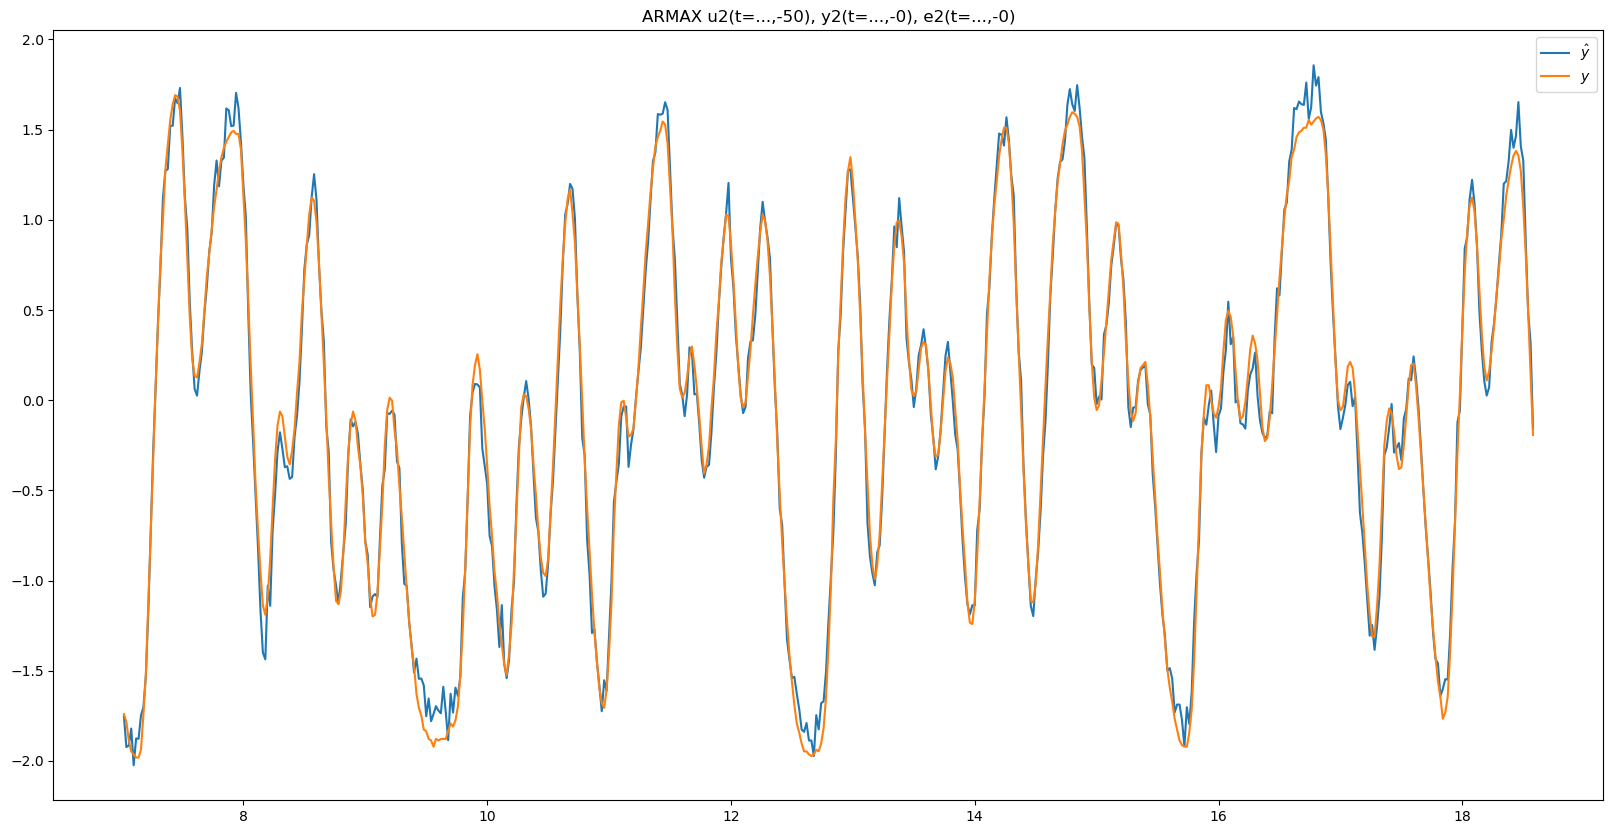

In [76]:
# simple ARX model

df = pd.DataFrame({'time':time2,'u': u2, 'y':y2})

order_u = 50 # fixed as the length of the input
order_y = 0
order_e = 0


for i in range(1, order_u + 1):
    df[f'u_lag{i}'] = df['u'].shift(i)

df = df.iloc[order_u:] # shorten the data because of NaNs (that come from lags)

endog = df['y']
exog = df[[f'u_lag{i}' for i in range(1, 1 + order_u)]]

model = ARIMA(endog, order=(order_y,0,order_e), exog=exog)

# take the starting parameters of the transfer function of u from step response estimation
start_params = np.concatenate((model.start_params[:1],g,model.start_params[order_u+1:]))

model_fit = model.fit()#start_params=start_params)
params = model_fit.params
print(model_fit.summary())

df['y_s'] = model.simulate(params, len(endog), exog=exog)#, initial_state=df['y'][:order_y])

plt.figure(figsize=(20,10))
plt.plot(df['time'],df['y_s'], label=r'$\hat{y}$')
plt.plot(df['time'],df['y'], label=r'$y$')
title = 'ARMAX u2(t=...,-{}), y2(t=...,-{}), e2(t=...,-{})'.format(order_u,order_y,order_e)
plt.title(title)
plt.savefig('figs/{}.eps'.format(title))
plt.legend()
plt.show()